In [97]:
import pandas as pd 
import shap
import catboost
import matplotlib.pyplot as plt 
from datetime import date
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
import numpy as np

In [98]:
category = 'Candy & Chocolate' # get category 

# load best model
today = date.today()
#model = pd.read_pickle('models/'+category+'/best_performing_model_'+str(today)+'.sav') # catboost-regressor
#model = pd.read_pickle('models/'+category+'/tuned_catboost_2022-05-01.sav') # catboost-regressor
#model = pd.read_pickle('models/'+category+'/catboost_model_lda_52022-05-01.sav') # catboost-regressor
#model = pd.read_pickle('models/'+category+'/rank_model2022-05-01.sav')
model = pd.read_pickle('models/'+category+'/rank_model_with_sentiment2022-05-01.sav')

# # load data 
df_train = pd.read_csv('data/' + category + '/df_train.csv')
df_test = pd.read_csv('data/' + category + '/df_test.csv')
# df_train = df_train.drop(columns=['description','std_rating'])
# df_test = df_test.drop(columns=['description','std_rating'])
# df_train = df_train.dropna()
# df_test = df_test.dropna()
# # X_train = df_train.drop(columns='avg_rating')
# # y_train = df_train['avg_rating']
# # X_test = df_test.drop(columns='avg_rating')
# # y_test = df_test['avg_rating']

# div_train = max(df_train['rank'])/99
# df_train['rank_new'] = np.floor(df_train['rank']/div_train)+1
# div_test = max(df_test['rank'])/99
# df_test['rank_new'] = np.floor(df_test['rank']/div_test)+1

X_train = df_train.drop(columns=['rank','rank_new','description'])
y_train = df_train['rank_new']
X_test = df_test.drop(columns=['rank','rank_new','description'])
y_test = df_test['rank_new']


In [87]:
df_train.rank_new.max()

100.0

In [88]:
plt.hist(df_train['rank_new'], bins=50)
plt.show()

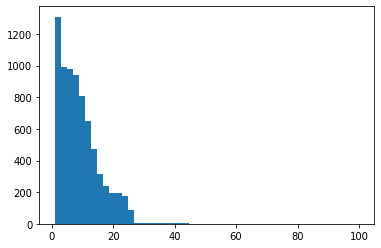

In [78]:
plt.hist(df_test['rank_new'], bins=50)
plt.show()

In [67]:
df_train.columns

Index(['avg_rating', 'description', 'also_buy', 'rank', 'also_view', 'price',
       'description_length', 'cluster_0', 'cluster_1', 'cluster_2',
       'cluster_3', 'cluster_4', 'lda1', 'lda2', 'lda3', 'lda4', 'lda5',
       'lda6', 'lda7', 'lda8', 'lda9', 'lda10', 'rank_new',
       'description_sentiment'],
      dtype='object')

In [101]:
preds = model.predict(X_test)
mean_absolute_error(y_test, preds)

5.174646535062913

In [102]:
X_test

avg_rating      price  description_length  cluster_0  cluster_1  \
0       4.500000  22.110722                 493          1          0   
1       5.000000  26.980000                 211          0          0   
2       4.166667   4.950000                 342          0          0   
3       5.000000  22.110722                 697          1          0   
4       1.000000   9.950000                 437          0          0   
...          ...        ...                 ...        ...        ...   
7397    4.166667  14.990000                 224          0          0   
7398    4.428571  22.110722                 485          1          0   
7399    3.571429   9.690000                 627          0          0   
7400    3.000000  22.110722                 199          0          0   
7401    5.000000  22.110722                 283          1          0   

      cluster_2  cluster_3  cluster_4      lda1      lda2      lda3      lda4  \
0             0          0          0  0.001754  0.001754  0.367021  0.001754   
1             1          0          0  0.005000  0.005000  0.005000  0.005000   
2             0          1          0  0.001695  0.001695  0.029478  0.001695   
3             0          0          0  0.002703  0.002703  0.108487  0.002703   
4             0          1          0  0.001639  0.001639  0.076295  0.001639   
...         ...        ...        ...       ...       ...       ...       ...   
7397          0          1          0  0.000559  0.014044  0.761188  0.000559   
7398          0          0          0  0.004348  0.004348  0.042079  0.004348   
7399          1          0          0  0.002500  0.027848  0.197411  0.002500   
7400          0          1          0  0.003846  0.048912  0.003846  0.003846   
7401          0          0          0  0.005000  0.005000  0.005000  0.005000   

          lda5      lda6      lda7      lda8      lda9     lda10  \
0     0.001755  0.001755  0.030591  0.590106  0.001754  0.001754   
1     0.005001  0.005000  0.005002  0.954997  0.005000  0.005000   
2     0.001695  0.358772  0.001695  0.574683  0.026897  0.001695   
3     0.087235  0.002704  0.113731  0.674327  0.002703  0.002705   
4     0.001639  0.415846  0.001640  0.477585  0.020439  0.001639   
...        ...       ...       ...       ...       ...       ...   
7397  0.000559  0.037588  0.068247  0.116140  0.000559  0.000559   
7398  0.093365  0.004349  0.004348  0.834119  0.004349  0.004348   
7399  0.002500  0.002500  0.002501  0.757240  0.002500  0.002500   
7400  0.003846  0.003847  0.003846  0.920318  0.003846  0.003846   
7401  0.005000  0.005000  0.084702  0.824338  0.055960  0.005000   

      description_sentiment  
0                    0.8689  
1                    0.4215  
2                    0.8807  
3                    0.7882  
4                    0.8555  
...                     ...  
7397                 0.7003  
7398                 0.6908  
7399                 0.6486  
7400                 0.4215  
7401                 0.6249  

[7402 rows x 19 columns]

In [103]:
# Get shap values 
explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(X_train)
shap_values_pandas = pd.DataFrame(shap_values)
shap_values_pandas.head()

0         1         2    3         4    5         6    7         8   \
0 -0.644075 -2.710720 -1.163403  0.0  0.000772  0.0 -0.000032  0.0  0.007352   
1 -3.936729 -4.545386 -0.582491  0.0 -0.000005  0.0  0.000032  0.0  0.003270   
2 -4.634264  3.596328  0.257248  0.0  0.000073  0.0 -0.000032  0.0  0.004040   
3 -4.019747  3.631809 -0.570725  0.0  0.000065  0.0 -0.000032  0.0  0.002514   
4  2.972921  3.823585 -0.436992  0.0 -0.000005  0.0 -0.000032  0.0  0.006599   

         9         10        11        12        13        14        15  \
0  0.049067  0.007203  0.000929  0.159548 -0.022681 -0.016504 -0.005741   
1  0.049067 -0.007143  0.013326  0.219847 -0.019879 -0.012945  0.078947   
2 -0.003566 -0.004202  0.002467 -0.002531 -0.001889  0.004362 -0.003447   
3 -0.008203  0.010224  0.000568 -0.052448  0.008305  0.028901  0.006602   
4  0.050860  0.009191  0.000929  0.007776 -0.133352  0.079689  0.077875   

         16        17        18  
0 -0.045059  0.114550  0.078993  
1 -0.036635 -0.006888  0.074027  
2  0.087369 -0.002477 -0.109749  
3 -0.042078 -0.006776  0.071659  
4  0.192416 -0.015783 -0.197359

In [104]:
shap_values_pandas.sum(axis=1)
print(explainer.expected_value)

[12.23761389]


In [105]:
df_train.loc[1311]

avg_rating                                                           3.375
description              delicious assortment nestle miniature candy ne...
rank                                                                300390
price                                                                12.99
description_length                                                    1166
cluster_0                                                                1
cluster_1                                                                0
cluster_2                                                                0
cluster_3                                                                0
cluster_4                                                                0
lda1                                                              0.002326
lda2                                                              0.002327
lda3                                                              0.002326
lda4                     

In [106]:
# shap force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1311,:], X_train.iloc[1311,:])

The above matrix of dimension samples x number of features shows the shap values. The sum of each row gives the difference from the overall mean (the expected value). 

In [33]:
# shap force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

The above figure shows how the features impact the prediction on the first 200 samples in the test data. Blue feature values are lowering the prediction and red feature values are increasing the prediction value. 


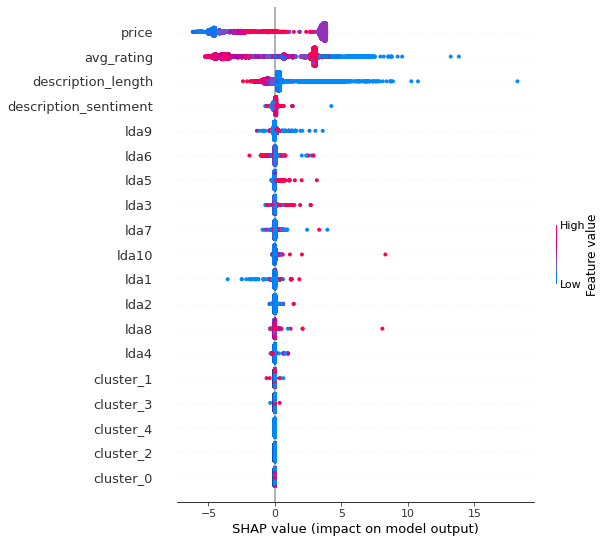

In [107]:
shap.summary_plot(shap_values, X_train)
plt.show()

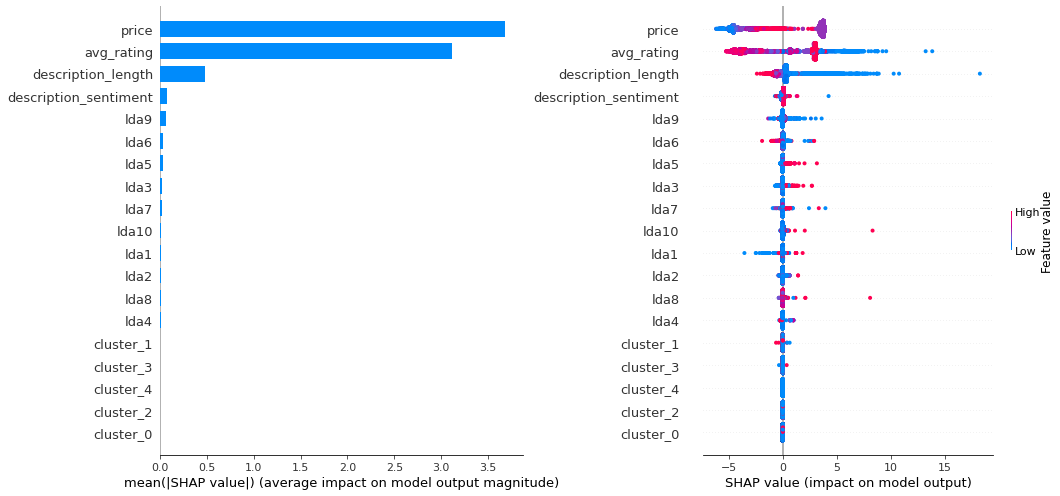

In [108]:
# shap summary plots
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, X_train, show=False, plot_size=None)
plt.tight_layout()
plt.show()

The above figures shows a summary of how the features impact the predictions. The right summary plot shows how the features impact the predictions and the left plot shows how the features impact the predictions in magnitude. 

From both plots, it is seen that the features with the highest impact on the predictions (average sales rating) are sales rank, the lda topics 1-5 and price. The clusers do not seem to have much impact on average rating and thus we could consider removing the clusters from the model. 

Looking at the sales rank at the right summary plot, it is seen that products with low sales rank (probably meaning that they sell a lot) tend to increase the prediction of average rating. Also it is seen that higher product prices often increases the prediction of average rating. 
KOMMENTER PÅ LDA TOPICS. 

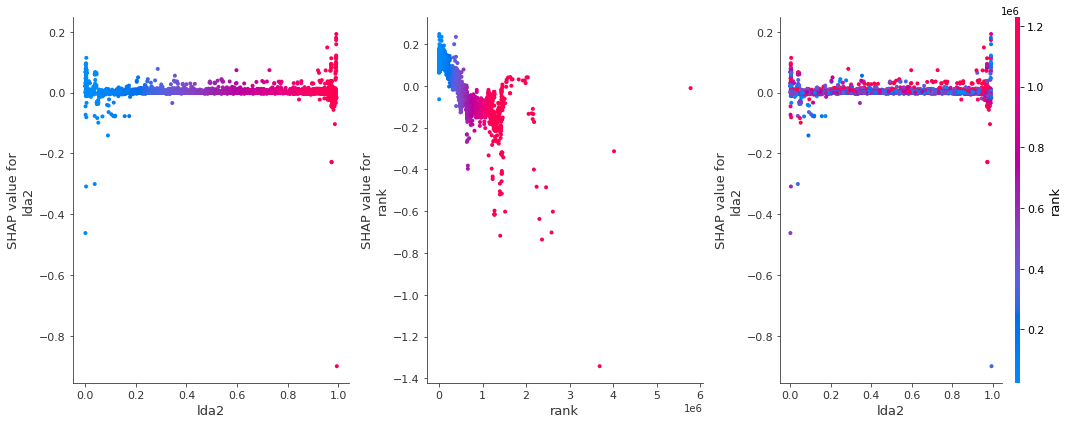

In [48]:
# shap summary plots
fig, axes = plt.subplots(1,3,figsize=(15,6))
shap.dependence_plot(ind='lda2', interaction_index='lda2',shap_values=shap_values, features=X_test, show=False, ax = axes[0])
shap.dependence_plot(ind='rank', interaction_index='rank',shap_values=shap_values, features=X_test, show=False, ax = axes[1])
shap.dependence_plot(ind='lda2', interaction_index='rank',shap_values=shap_values, features=X_test, show=False, ax = axes[2])
plt.tight_layout()
plt.show()

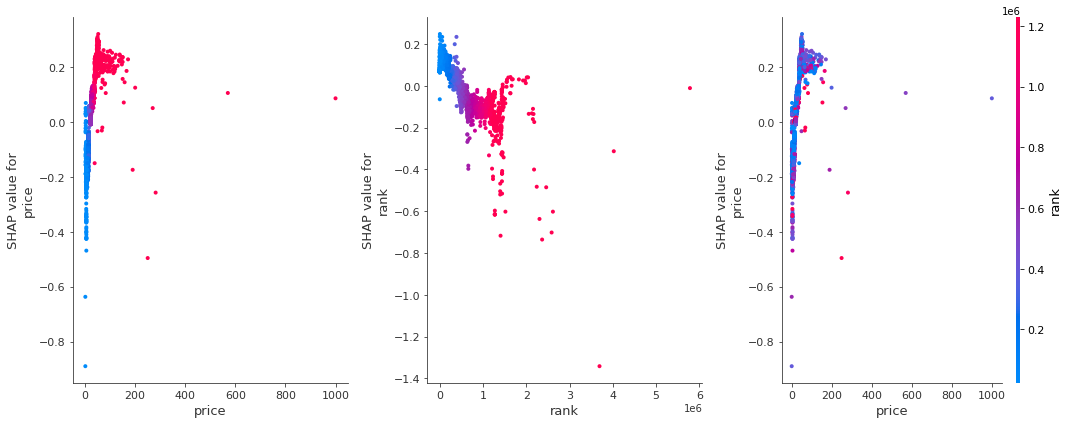

In [49]:
# shap summary plots
fig, axes = plt.subplots(1,3,figsize=(15,6))
shap.dependence_plot(ind='price', interaction_index='price',shap_values=shap_values, features=X_test, show=False, ax = axes[0])
shap.dependence_plot(ind='rank', interaction_index='rank',shap_values=shap_values, features=X_test, show=False, ax = axes[1])
shap.dependence_plot(ind='price', interaction_index='rank',shap_values=shap_values, features=X_test, show=False, ax = axes[2])
plt.tight_layout()
plt.show()

Partial dependence plots. Shows shap values against feature. Also possible to look at two-ways interactions. 

# Lime

In [13]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


In [50]:
df_train.loc[1311]

avg_rating         3.423729
num_ratings       59.000000
also_buy        1232.000000
rank           11121.000000
also_view          2.000000
price             16.990000
cluster_0          1.000000
cluster_1          0.000000
cluster_2          0.000000
cluster_3          0.000000
cluster_4          0.000000
lda1               0.924554
lda2               0.069613
lda3               0.005833
Name: 1311, dtype: float64

In [52]:
explainer = LimeTabularExplainer(X_train.values,
                                 mode='regression',
                                 feature_names = X_train.columns,
                                 discretize_continuous=True)

We have a LimeTabularExplainer because the data is in a dataframe. We use regression and discretize_continuous if True, all non-categorical features will be discretized into quartiles.

In [53]:
#pred_diff = abs(y_test - model.predict(X_test))
#min_error_ind = np.argmin(pred_diff)
exp = explainer.explain_instance(X_train.values[1311], 
                                 model.predict, num_features=5)
exp.show_in_notebook(show_all=False) 
# only the features used in the explanation are displayed

Here we have used the week 4 notebook to just explain the prediction with lowest error. Below we do the same for the prediction with the highest error.
We can give any index of a prediction and see how important each feature is. 
Maybe standardize some features. 

In [27]:
max_error_ind = np.argmax(pred_diff)

exp = explainer.explain_instance(X_test.values[max_error_ind], 
                                 model.predict, num_features=5)
exp.show_in_notebook(show_all=False)
# only the features used in the explanation are displayed

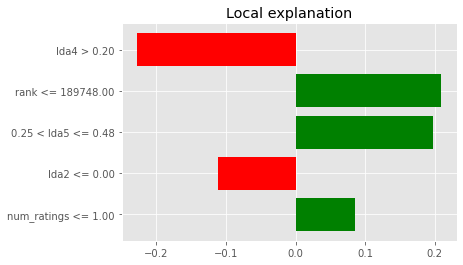

In [28]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [8]:
# plot of catboost tree  
pool = catboost.Pool(X_test, y_test, cat_features=[], feature_names=list(X_test.columns))
model.plot_tree(tree_idx=0,pool=pool)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH